## Homework

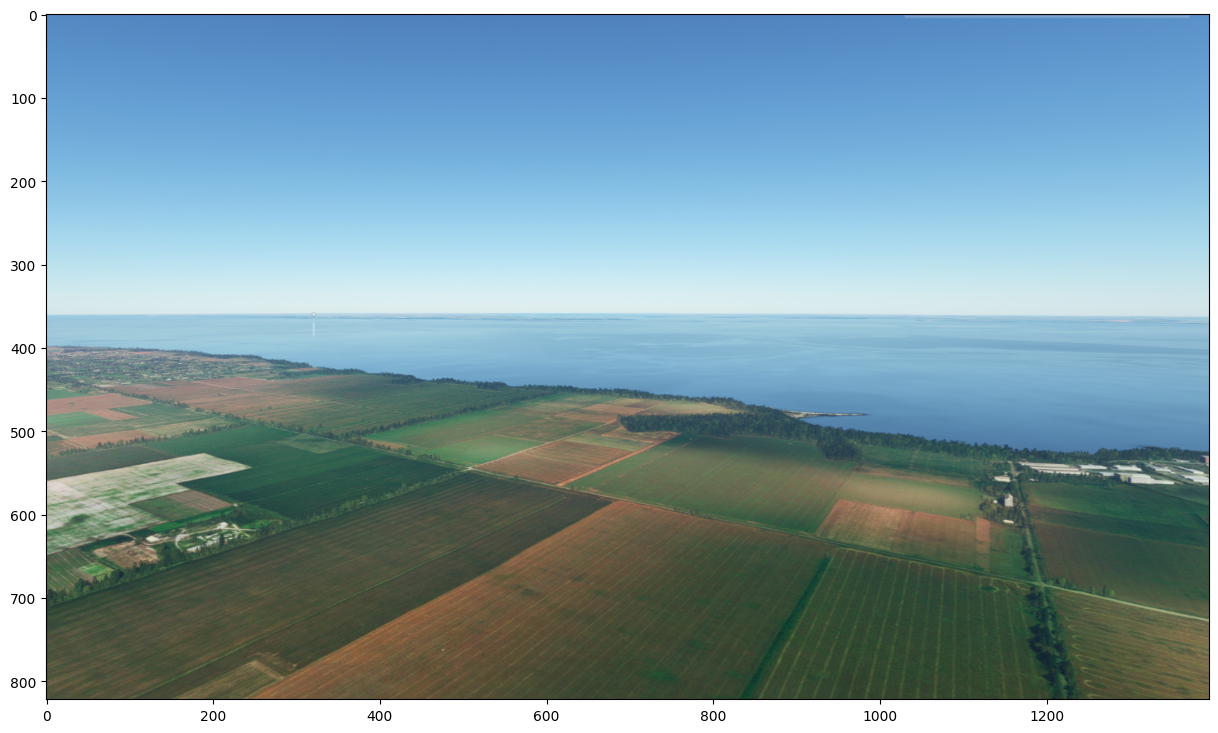

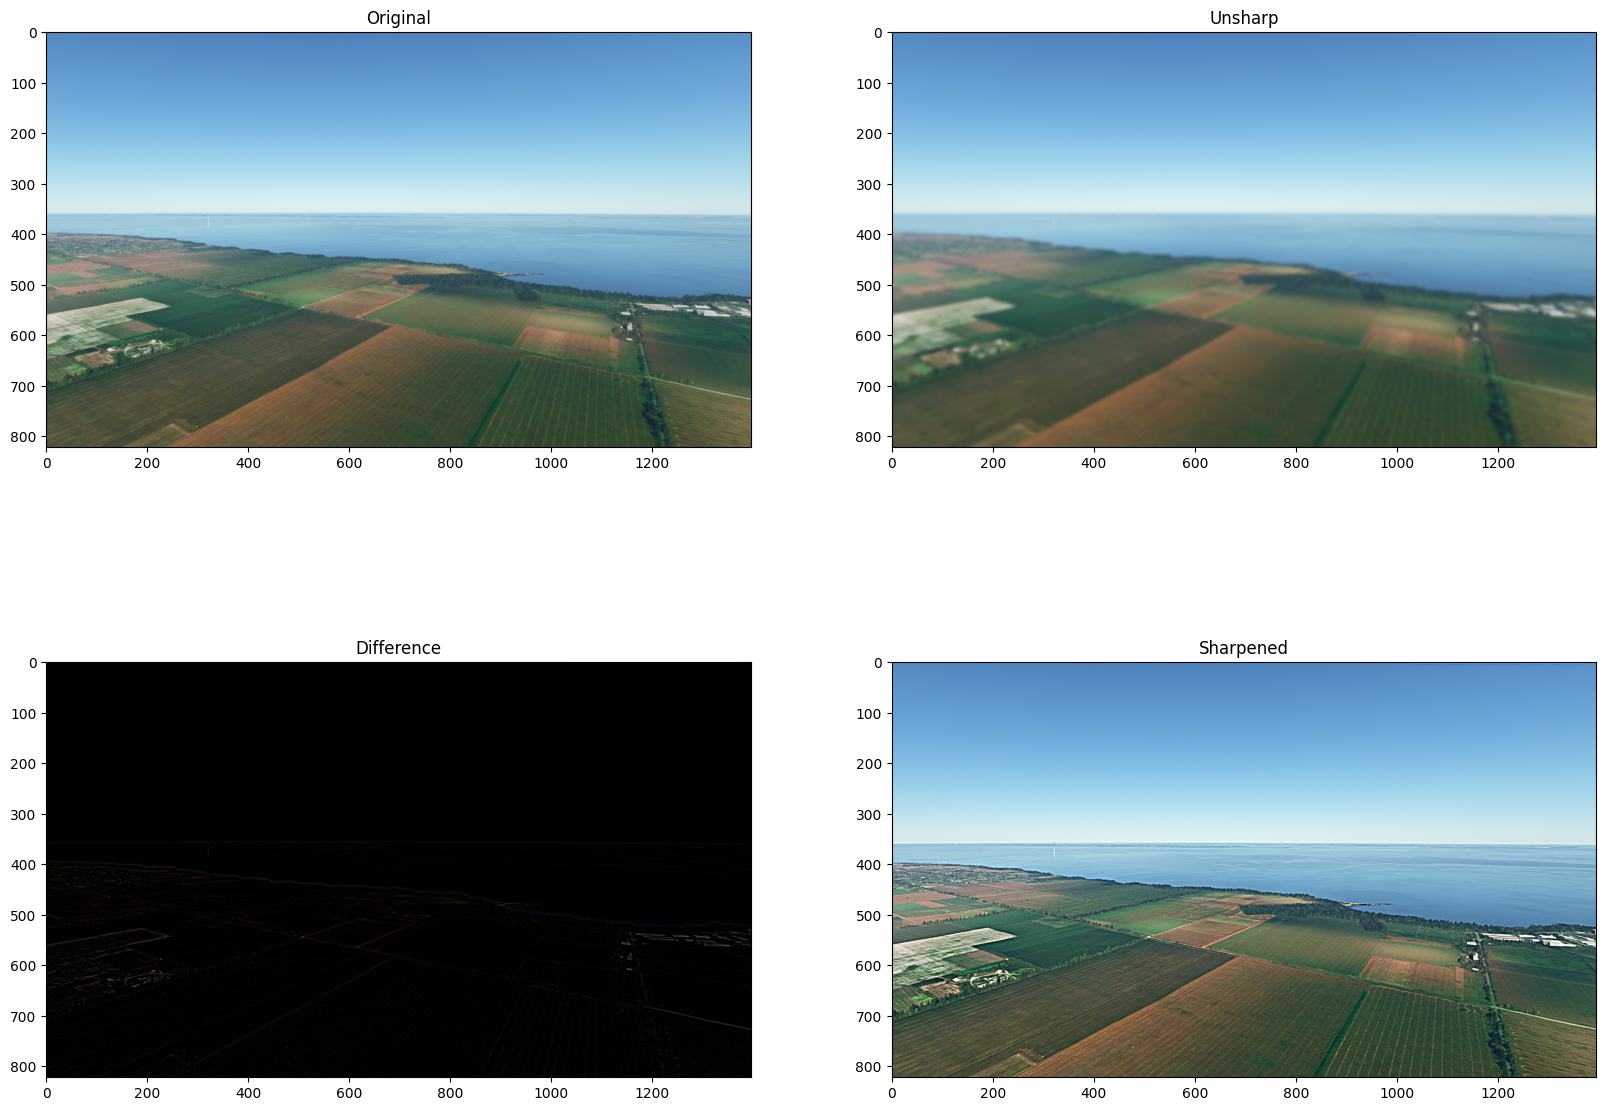

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

# Load the image
img = cv2.imread('dron_image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (0, 0), 3)

# Create the difference image (original − unsharp)
diff = cv2.subtract(img, unsharp)

# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
amount = 1.5
sharpened = cv2.addWeighted(img, 1 + amount, unsharp, -amount, 0)

# Display the original, unsharp, difference, and sharpened images
plt.figure(figsize=(20, 15))
plt.subplot(221), plt.imshow(img), plt.title('Original')
plt.subplot(222), plt.imshow(unsharp), plt.title('Unsharp')
plt.subplot(223), plt.imshow(diff), plt.title('Difference')
plt.subplot(224), plt.imshow(sharpened), plt.title('Sharpened')
plt.show()


## Tasks

#### Інвертоване зображення з використанням бібліотек.

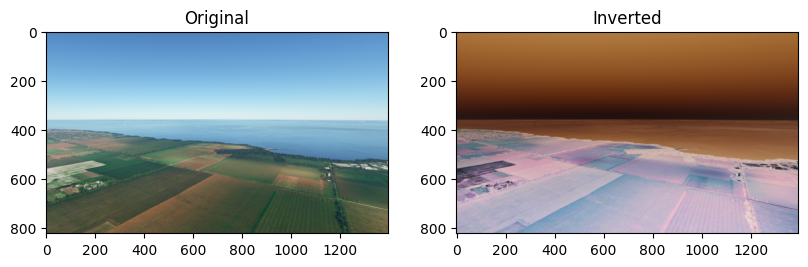

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Завантаження зображення
image_path = 'dron_image.png'
image = cv2.imread(image_path)

# Інвертування кольорової інтенсивності пікселів
inverted_image = cv2.bitwise_not(image)

# Виведення зображень у більшому розмірі
plt.figure(figsize=(15, 5))

# Виведення зображень
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(inverted_image, cv2.COLOR_BGR2RGB)), plt.title('Inverted')
plt.show()


#### Інвертоване зображення власноруч.

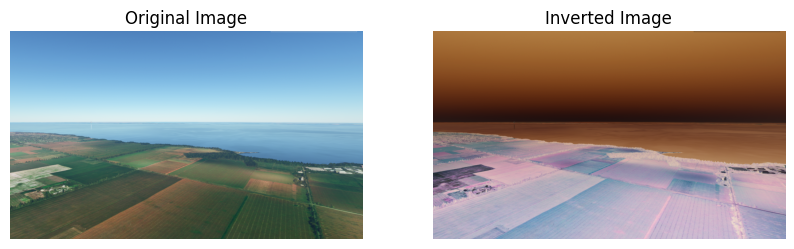

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Шлях до зображення у форматі PNG
image_path = "dron_image.png"

# Завантаження зображення
image = Image.open(image_path)

# Отримання розмірів зображення
width, height = image.size

# Конвертування зображення до формату numpy array
original_image_array = np.array(image)


# Інвертування кольорової інтенсивності пікселів
inverted_image = image.copy()
for x in range(width):
    for y in range(height):
        # Отримання значення кольору пікселя
        r, g, b, a = inverted_image.getpixel((x, y))
        # Інвертування інтенсивності кольору
        inverted_r = 255 - r
        inverted_g = 255 - g
        inverted_b = 255 - b
        # Встановлення нового значення пікселя
        inverted_image.putpixel((x, y), (inverted_r, inverted_g, inverted_b, a))

# Конвертування інвертованого зображення до формату numpy array
inverted_image_array = np.array(inverted_image)

# Відображення оригінального зображення
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image_array)
plt.title('Original Image')
plt.axis('off')

# Відображення інвертованого зображення
plt.subplot(1, 2, 2)
plt.imshow(inverted_image_array)
plt.title('Inverted Image')
plt.axis('off')

plt.show()


#### Додавання значення до пікселів з використаннім бібліотек.

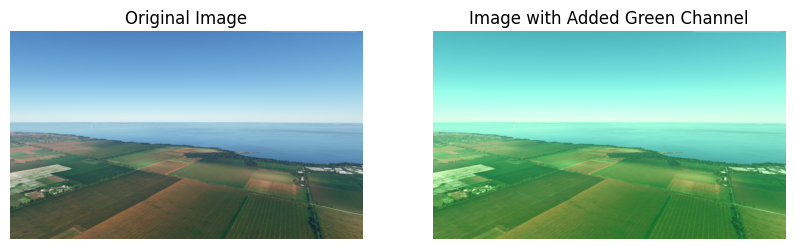

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантаження зображення
image_path = 'dron_image.png'
image = cv2.imread(image_path)

# Додаємо значення до каналу зеленого (G) з обмеженням до 255
image_with_added_value = image.astype(np.int16)  # Конвертуємо в int16 для обробки
image_with_added_value[:, :, 1] = np.minimum(image_with_added_value[:, :, 1] + 50, 255)  # Додаємо та обмежуємо до 255
image_with_added_value = np.clip(image_with_added_value, 0, 255).astype(np.uint8)  # Обмежуємо значення до 0-255 та конвертуємо назад у uint8

# Відображення оригінального та модифікованого зображення
plt.figure(figsize=(10, 5))

# Відображення оригінального зображення
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Відображення зображення після додавання значення до зеленого каналу
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_added_value, cv2.COLOR_BGR2RGB))
plt.title('Image with Added Green Channel')
plt.axis('off')

plt.show()


#### Додавання значення до пікселів власноруч.

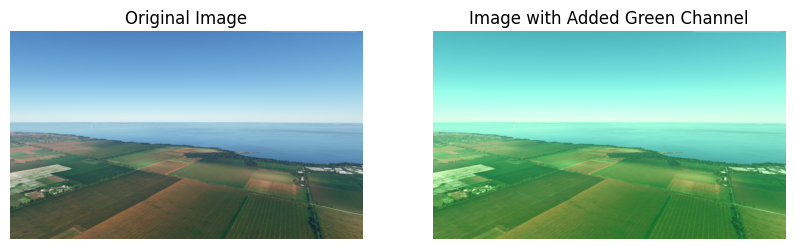

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантаження зображення
image_path = 'dron_image.png'
image = cv2.imread(image_path)

# Створення копії зображення для обробленого зображення
processed_image = np.copy(image)

# Додаємо значення до каналу зеленого (G)
for x in range(processed_image.shape[0]):
    for y in range(processed_image.shape[1]):
        # Збільшуємо значення зеленого каналу на 50
        processed_image[x, y, 1] = min(processed_image[x, y, 1] + 50, 255)

# Відображення оригінального зображення та зображення після модифікації
plt.figure(figsize=(10, 5))

# Відображення оригінального зображення
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Відображення обробленого зображення
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Added Green Channel')
plt.axis('off')

plt.show()

#### Розбивка на компоненти з використанням біблотек.

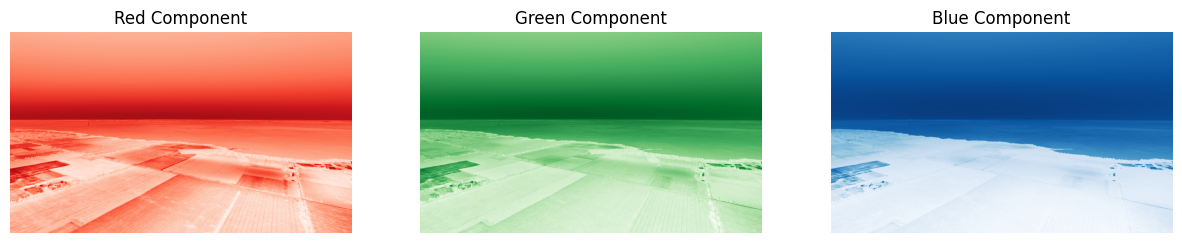

In [6]:
import cv2
import matplotlib.pyplot as plt

# Завантаження зображення
image_path = 'dron_image.png'
image = cv2.imread(image_path)

# Розділення на компоненти BGR
blue, green, red = cv2.split(image)

# Відображення компонент зображення
plt.figure(figsize=(15, 5))  # Задаємо розмір фігури

# Відображення червоної компоненти
plt.subplot(1, 3, 1)
plt.imshow(red, cmap='Reds')
plt.title('Red Component')
plt.axis('off')

# Відображення зеленої компоненти
plt.subplot(1, 3, 2)
plt.imshow(green, cmap='Greens')
plt.title('Green Component')
plt.axis('off')

# Відображення синьої компоненти
plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='Blues')
plt.title('Blue Component')
plt.axis('off')

plt.show()


#### Розбивка на компоненти власноруч.

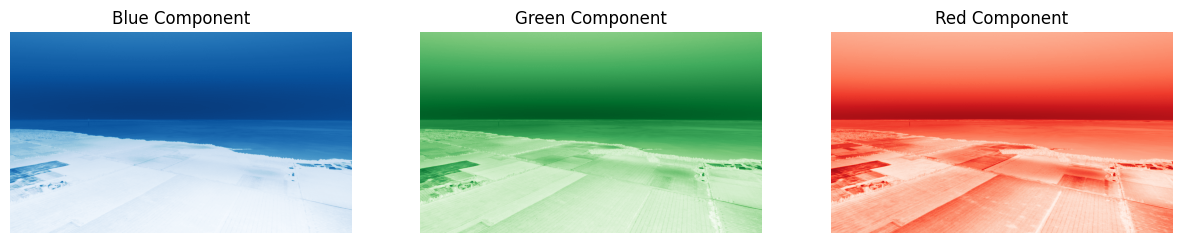

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантаження зображення
image_path = 'dron_image.png'
image = cv2.imread(image_path)

# Отримання розміру зображення
height, width, _ = image.shape

# Ініціалізація пустих матриць для компонент кольору
blue_component = np.zeros((height, width), dtype=np.uint8)
green_component = np.zeros((height, width), dtype=np.uint8)
red_component = np.zeros((height, width), dtype=np.uint8)

# Розділення на компоненти BGR
for y in range(height):
    for x in range(width):
        blue_component[y, x] = image[y, x, 0]  # Синій канал (B)
        green_component[y, x] = image[y, x, 1]  # Зелений канал (G)
        red_component[y, x] = image[y, x, 2]  # Червоний канал (R)

# Відображення кожної компоненти
plt.figure(figsize=(15, 5))

# Відображення синьої компоненти
plt.subplot(1, 3, 1)
plt.imshow(blue_component, cmap='Blues')
plt.title('Blue Component')
plt.axis('off')

# Відображення зеленої компоненти
plt.subplot(1, 3, 2)
plt.imshow(green_component, cmap='Greens')
plt.title('Green Component')
plt.axis('off')

# Відображення червоної компоненти
plt.subplot(1, 3, 3)
plt.imshow(red_component, cmap='Reds')
plt.title('Red Component')
plt.axis('off')

plt.show()


#### Злиття двох зображень.

In [8]:
import cv2

# Завантаження першого та другого зображень
image1 = cv2.imread('dron_image.jpg')
image2 = cv2.imread('clouds.jpg')

# Перевірка розмірів зображень
if image1 is None or image2 is None or image1.shape[0] == 0 or image1.shape[1] == 0 or image2.shape[0] == 0 or image2.shape[1] == 0:
    print("Одне або обидва зображення мають невірні розміри або не були завантажені.")
else:
    # Здійснюємо злиття зображень
    alpha = 0.4  # Пропорція для першого зображення
    merged_image = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)

    # Відображення та збереження результату
    cv2.imshow('Merged Image', merged_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Одне або обидва зображення мають невірні розміри або не були завантажені.


In [9]:
import cv2
import numpy as np
from tkinter import Tk, Scale, HORIZONTAL

# Завантаження першого та другого зображень
image1_path = 'dron_image.png'
image1 = cv2.imread(image1_path)
image2_path = 'clouds.png'
image2 = cv2.imread(image2_path)

# Функція для оновлення змішаного зображення
def update_merged_image(alpha_str):
    alpha = int(alpha_str)  # Конвертація рядка у ціле число
    resized_image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))
    merged_image = cv2.addWeighted(resized_image1, alpha / 100, image2, 1 - alpha / 100, 0)
    cv2.imshow('Merged Image', merged_image)

# Створення графічного інтерфейсу
root = Tk()
root.title("Image Mixing")
alpha_scale = Scale(root, from_=0, to=100, orient=HORIZONTAL, label="Alpha (%)", command=update_merged_image, resolution=10)
alpha_scale.set(65)  # Значення за замовчуванням (65%)
alpha_scale.pack()
root.mainloop()


#### Медіанний фільтр

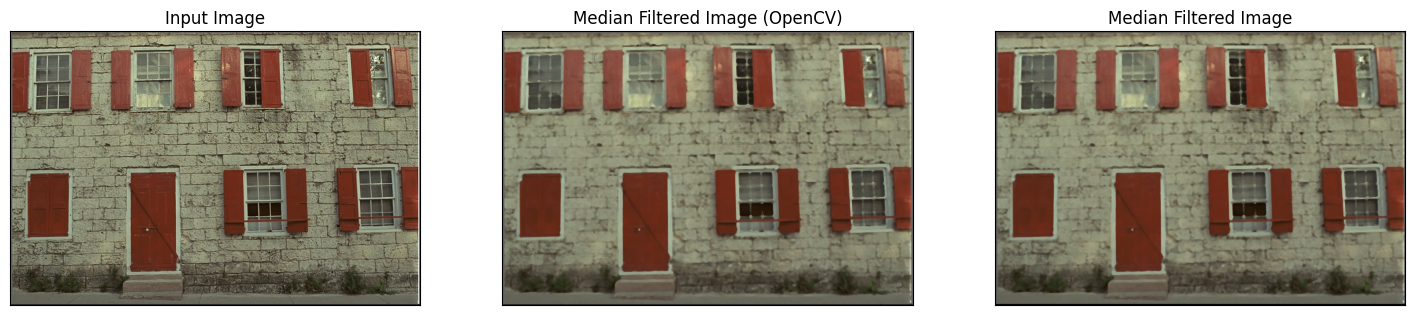

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Завантаження вхідного зображення
image = cv2.imread('kodim01.png')  # Завантаження в чорно-білому форматі

# Медіанний фільтр за допомогою бібліотеки OpenCV
median_filtered_opencv = cv2.medianBlur(image, 5)  # Розмір ядра: 5x5

# Реалізація власноручного медіанного фільтра
def custom_median_filter(image, kernel_size):
    filtered_image = np.zeros_like(image)

    # Розділення каналів BGR
    b, g, r = cv2.split(image)
    padding = kernel_size // 2
    
    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            neighbourhood_b = b[i-padding:i+padding+1, j-padding:j+padding+1].flatten()
            neighbourhood_g = g[i-padding:i+padding+1, j-padding:j+padding+1].flatten()
            neighbourhood_r = r[i-padding:i+padding+1, j-padding:j+padding+1].flatten()
            
            median_value_b = np.median(neighbourhood_b)
            median_value_g = np.median(neighbourhood_g)
            median_value_r = np.median(neighbourhood_r)

            filtered_image[i, j] = [median_value_b, median_value_g, median_value_r]
    
    return filtered_image

# Застосування власноруч реалізованого медіанного фільтра
custom_median_filtered = custom_median_filter(image, kernel_size=5)

# Відображення вхідного зображення та оброблених зображень
plt.figure(figsize=(18, 6))

# Відображення вхідного зображення
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

# Відображення обробленого зображення після медіанного фільтра OpenCV
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_filtered_opencv, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image (OpenCV)')
plt.xticks([]), plt.yticks([])

# Відображення обробленого зображення після власноруч реалізованого медіанного фільтра
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(custom_median_filtered, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image')
plt.xticks([]), plt.yticks([])

plt.show()


#### Нарощування

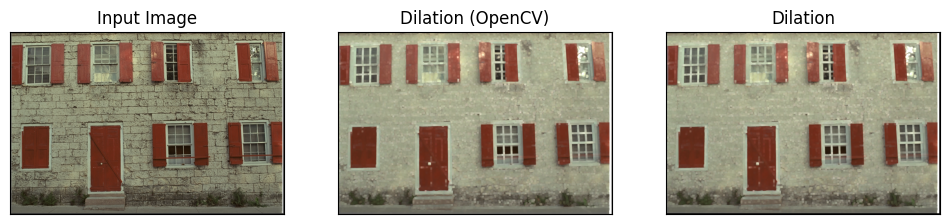

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Завантаження вхідного зображення
image = cv2.imread('kodim01.png')  # Завантаження в чорно-білому форматі

# Реалізація власноручного фільтру нарощування
def custom_dilation(image, kernel):
    height, width, channels = image.shape
    dilation_image = np.zeros((height, width, channels), dtype=np.uint8)

    kernel_height, kernel_width = kernel.shape[:2]
    kernel_half_height = kernel_height // 2
    kernel_half_width = kernel_width // 2

    for c in range(channels):
        for i in range(kernel_half_height, height - kernel_half_height):
            for j in range(kernel_half_width, width - kernel_half_width):
                dilation_image[i, j, c] = np.max(image[i - kernel_half_height:i + kernel_half_height + 1,
                                              j - kernel_half_width:j + kernel_half_width + 1, c] * kernel)

    return dilation_image

# Фільтр нарощування за допомогою OpenCV
kernel = np.ones((5, 5), np.uint8)
dilation_opencv = cv2.dilate(image, kernel, iterations=1)

# Фільтр нарощування за допомогою власноручної реалізації
custom_dilation_image = custom_dilation(image, kernel)

# Відображення вхідного зображення та оброблених зображень для фільтра нарощування
plt.figure(figsize=(12, 8))

# Відображення вхідного зображення
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

# Відображення обробленого зображення після нарощування OpenCV
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(dilation_opencv, cv2.COLOR_BGR2RGB))
plt.title('Dilation (OpenCV)')
plt.xticks([]), plt.yticks([])

# Відображення обробленого зображення після власноруч реалізованого фільтру нарощування
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(custom_dilation_image, cv2.COLOR_BGR2RGB))
plt.title('Dilation')
plt.xticks([]), plt.yticks([])

plt.show()


#### Ерозія

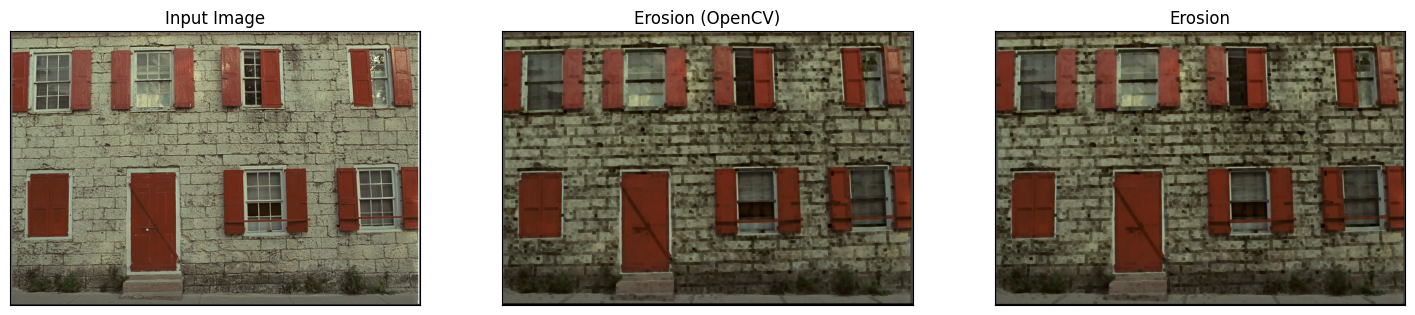

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Завантаження вхідного зображення
image = cv2.imread('kodim01.png')  # Завантаження в чорно-білому форматі

# Реалізація методу ерозії власноруч
def custom_erosion(image, kernel):
    # Отримання розміру зображення та ядра
    height, width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]
    
    # Ініціалізація вихідного зображення
    erosion_image = np.zeros_like(image, dtype=np.uint8)
    
    # Обробка кожного пікселя вхідного зображення
    for i in range(kernel_height // 2, height - kernel_height // 2):
        for j in range(kernel_width // 2, width - kernel_width // 2):
            # Застосування ерозії
            for k in range(3):  # Проходження по кожному каналу
                erosion_image[i, j, k] = np.min(image[i - kernel_height // 2:i + kernel_height // 2 + 1,
                                                       j - kernel_width // 2:j + kernel_width // 2 + 1, k] - kernel)
    
    return erosion_image


# Ядро для методу ерозії
kernel = np.ones((5, 5), np.uint8)

# Виклик методу ерозії
custom_erosion_image = custom_erosion(image, kernel)

# Метод ерозії за допомогою OpenCV
erosion_opencv = cv2.erode(image, kernel, iterations=1)

# Відображення вхідного зображення та зображення з ерозією
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(erosion_opencv, cv2.COLOR_BGR2RGB))
plt.title('Erosion (OpenCV)')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(custom_erosion_image, cv2.COLOR_BGR2RGB))
plt.title('Erosion')
plt.xticks([]), plt.yticks([])

plt.show()


#### Фільтр Собеля

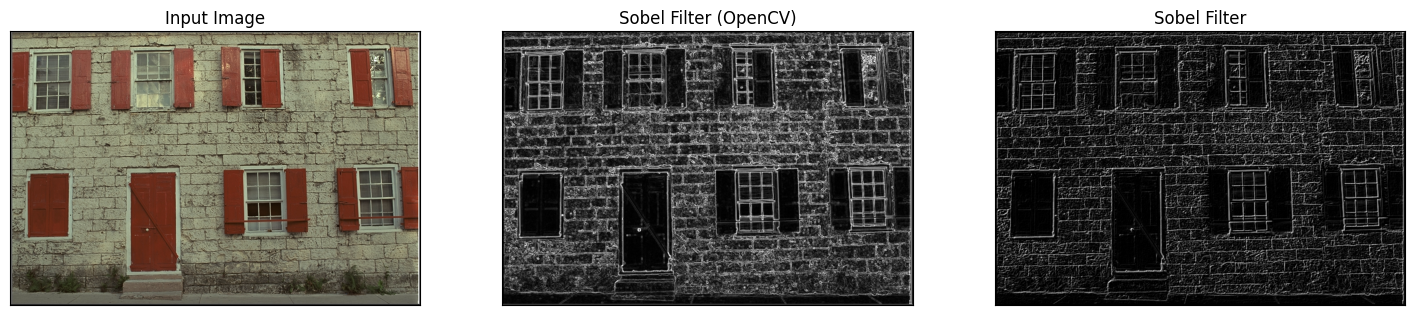

In [13]:
# Завантаження вхідного зображення
image = cv2.imread('kodim01.png')

# Виділення зеленого каналу (G)
green_channel = image[:, :, 1]

# Оператори Собеля для обчислення похідних за допомогою OpenCV
sobelx_opencv = cv2.Sobel(green_channel, cv2.CV_64F, 1, 0, ksize=3)  # Горизонтальний Собель
sobely_opencv = cv2.Sobel(green_channel, cv2.CV_64F, 0, 1, ksize=3)  # Вертикальний Собель

# Об'єднання результатів горизонтального та вертикального фільтрів Собеля
sobel_combined_opencv = cv2.addWeighted(cv2.convertScaleAbs(sobelx_opencv), 0.5, 
                                        cv2.convertScaleAbs(sobely_opencv), 0.5, 0)

# Власноручна реалізація фільтра Собеля
def custom_sobel_filter(image):
    # Створення ядер Собеля
    sobelx = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])
    sobely = np.array([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]])
    
    # Застосування фільтрів Собеля
    sobelx_filtered = cv2.filter2D(image, -1, sobelx)
    sobely_filtered = cv2.filter2D(image, -1, sobely)
    
    # Об'єднання результатів горизонтального та вертикального фільтрів Собеля
    sobel_combined = cv2.addWeighted(cv2.convertScaleAbs(sobelx_filtered), 0.5, 
                                     cv2.convertScaleAbs(sobely_filtered), 0.5, 0)
    
    return sobel_combined

# Застосування власноручної реалізації фільтра Собеля
custom_sobel_image = custom_sobel_filter(green_channel)

# Відображення вхідного зображення, методу Собеля за допомогою OpenCV та власноручної реалізації фільтра Собеля
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(sobel_combined_opencv, cmap='gray')
plt.title('Sobel Filter (OpenCV)'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(custom_sobel_image, cmap='gray')
plt.title('Sobel Filter'), plt.xticks([]), plt.yticks([])

plt.show()



#### Водяний знак

In [14]:
import cv2
import numpy as np
from tkinter import Tk, Scale, HORIZONTAL

# Завантаження зображень
container_image = cv2.imread('dron_image.png', cv2.IMREAD_COLOR)
watermark_image = cv2.imread('clouds.png', cv2.IMREAD_GRAYSCALE)

# Перевірка розмірів зображень
if container_image is not None and watermark_image is not None:
    if container_image.shape[0] == 0 or container_image.shape[1] == 0 or watermark_image.shape[0] == 0 or watermark_image.shape[1] == 0:
        print("Одне або обидва зображення мають невірні розміри або не були завантажені.")
    else:
        # Масштабування зображень до однакового розміру, якщо потрібно
        if container_image.shape[0] != watermark_image.shape[0] or container_image.shape[1] != watermark_image.shape[1]:
            watermark_image = cv2.resize(watermark_image, (container_image.shape[1], container_image.shape[0]))

        # Порогова обробка для перетворення водяного знаку на бінарне зображення
        _, watermark_image = cv2.threshold(watermark_image, 127, 255, cv2.THRESH_BINARY)

# Параметр "номер бітової площини" (мінімальне значення - 1)
bit_plane_number = 1

# Вбудовування водяного знаку в канал Blue зображення-контейнера
container_image[:, :, 0] = np.bitwise_or(container_image[:, :, 0], (watermark_image >> (8 - bit_plane_number)))

# Відображення різниці в результаті вбудовування
def update_watermark(val):
    global bit_plane_number
    bit_plane_number = int(val)
    container_with_watermark = np.copy(container_image)
    container_with_watermark[:, :, 0] = np.bitwise_or(container_image[:, :, 0], (watermark_image >> (8 - bit_plane_number)))
    cv2.imshow('Container Image with Watermark', container_with_watermark)

# Створення графічного інтерфейсу
root = Tk()
root.title("Bit Plane Number")
scale = Scale(root, from_=1, to=8, orient=HORIZONTAL, label="Bit Plane Number", command=update_watermark)
scale.set(1)
scale.pack()
root.mainloop()


#### Вилучення водяного знака

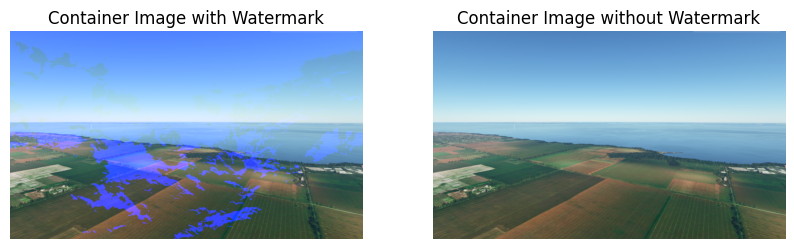

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантаження зображень
container_image = cv2.imread('dron_image.png', cv2.IMREAD_COLOR)
watermark_image = cv2.imread('clouds.png', cv2.IMREAD_GRAYSCALE)

# Перевірка розмірів зображень
if container_image is not None and watermark_image is not None:
    if container_image.shape[0] == 0 or container_image.shape[1] == 0 or watermark_image.shape[0] == 0 or watermark_image.shape[1] == 0:
        print("Одне або обидва зображення мають невірні розміри або не були завантажені.")
    else:
        # Масштабування зображень до однакового розміру, якщо потрібно
        if container_image.shape[0] != watermark_image.shape[0] or container_image.shape[1] != watermark_image.shape[1]:
            watermark_image = cv2.resize(watermark_image, (container_image.shape[1], container_image.shape[0]))

        # Порогова обробка для перетворення водяного знаку на бінарне зображення
        _, watermark_image = cv2.threshold(watermark_image, 127, 255, cv2.THRESH_BINARY)

        # Вбудовування водяного знаку з 8 значущими бітами
        container_image_with_watermark = np.copy(container_image)
        container_image_with_watermark[:, :, 0] = np.bitwise_or(container_image[:, :, 0], (watermark_image >> 0))  # Зсув на 0 бітів для використання 8 біт

        # Виведення зображень
        plt.figure(figsize=(10, 5))

        # Зображення з водяним знаком
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(container_image_with_watermark, cv2.COLOR_BGR2RGB))
        plt.title('Container Image with Watermark')
        plt.axis('off')

        # Зображення без водяного знаку
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(container_image, cv2.COLOR_BGR2RGB))
        plt.title('Container Image without Watermark')
        plt.axis('off')

        plt.show()
